Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **22. listopada 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
import numpy as np
import scipy as sp
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [3]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

print(X)
print(y)

[[0]
 [1]
 [2]
 [4]]
[4 1 2 5]


### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(1)
fi = poly.fit_transform(X)
print(fi)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg

w = (linalg.inv(fi.T@fi)@fi.T)@y
print(w)
print(linalg.pinv(fi)@y)


[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [6]:
from sklearn.metrics import mean_squared_error
print("w.T: ", w.T)
print("fi: ", fi)
h = fi @ w.T
print("h: ", np.round(h, 3))

error = mean_squared_error(y, h)
print("error: ", np.round(error, 5))

w.T:  [2.2        0.45714286]
fi:  [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]
h:  [2.2   2.657 3.114 4.029]
error:  2.04286


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.


In [7]:
print("fi: \n", fi)
print("y: \n", y)
if fi.shape[0] == fi.shape[1]: # Matrica je kvadratna
    if np.linalg.det(fi) != 0: # Matrica ima inverz
        print("Matrica ima inverz\n")
        print("Inverz: \n", linalg.inv(fi) @ y)
    else:
        print("Pseudoinverz: \n", linalg.pinv(fi))
        print("Matrica nema inverz")
        print("w = fi @ y \n", linalg.pinv(fi) @ y)
else: # matrica nije kvadratna, sigurno nema inverz
    print("Matrica nema inverz")
    print("Pseudoinverz: \n", linalg.pinv(fi))
    print("w = fi @ y \n", linalg.pinv(fi) @ y)



fi: 
 [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]
y: 
 [4 1 2 5]
Matrica nema inverz
Pseudoinverz: 
 [[ 0.6         0.4         0.2        -0.2       ]
 [-0.2        -0.08571429  0.02857143  0.25714286]]
w = fi @ y 
 [2.2        0.45714286]


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

w calculated by pseudoinverse: 
 [2.2        0.45714286]
w calculated by linear regression:
w0:  2.2
w1:  0.45714285714285713


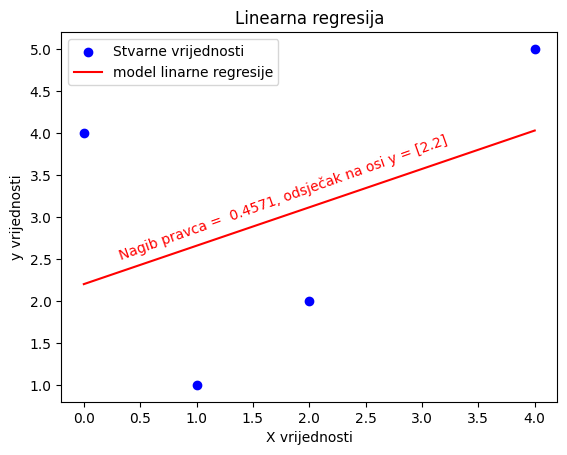

In [8]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

print("w calculated by pseudoinverse: \n", w)
reg = LinearRegression().fit(X, y) # fit_intercept : bool, default=True ---> unutar klase LinearRegression
print("w calculated by linear regression:")
print("w0: ", reg.intercept_)
print("w1: ", reg.coef_[0])

# Nacrtajte točke iz X i y
plt.scatter(X[:, 0], y, color='blue', label='Stvarne vrijednosti')
# Nacrtajte pravac linearne regresije
predicted = reg.predict(X)
plt.plot(X[:, 0], predicted, color='red', label='model linarne regresije')
plt.xlabel('X vrijednosti')
plt.ylabel('y vrijednosti')
plt.title('Linearna regresija')
plt.legend()
slope_text = f"Nagib pravca =  {np.round(reg.coef_, 4)[0]}, odsječak na osi y = {reg.predict([[0]])}"
angle = np.arctan(reg.coef_) * (180/np.pi)  # konverzija iz radijana u stupnjeve
plt.text(0.3, reg.predict([[0.3]])[0] + 0.15, slope_text, fontsize=10, rotation=float(angle) - 5, color='red')
plt.show()



### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
from numpy.random import normal
from numpy.random import uniform


f = lambda x: (5 + x - 2*(x**2) - 5*(x**3))

def make_labels(X, f, noise=0):
    return (f(X) + normal(0, noise, size=X.shape[0]).reshape(-1, 1))

N = 50
noise = 200

print(X.shape)
y = make_labels(X, f, 200)
print(y.shape)

(4, 1)
(4, 1)


Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

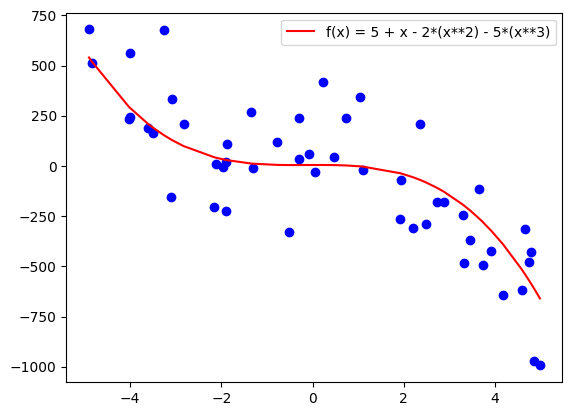

In [11]:
a = sorted(uniform(-5, 5, N))
X = np.array(a).reshape(-1, 1)
y = make_labels(X, f, noise)
plt.plot(X, f(X), color='red', label='f(x) = 5 + x - 2*(x**2) - 5*(x**3)')
plt.scatter(X, y, color='blue')
plt.legend()
plt.show()


### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

(50, 4)
(50, 1)


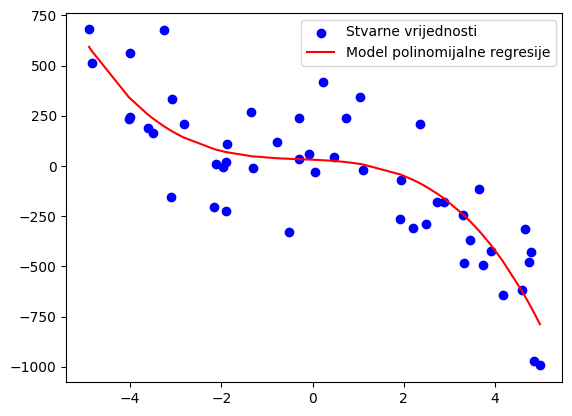

Pogreška učenja: 38304.20462412169


In [12]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

print(X_poly.shape)
print(y.shape)

model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.scatter(X, y, color='blue', label='Stvarne vrijednosti')
plt.plot(X, y_pred, color='red', label='Model polinomijalne regresije')
plt.legend()
plt.show()

mse = mean_squared_error(y, y_pred)
print(f"Pogreška učenja: {mse}")

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

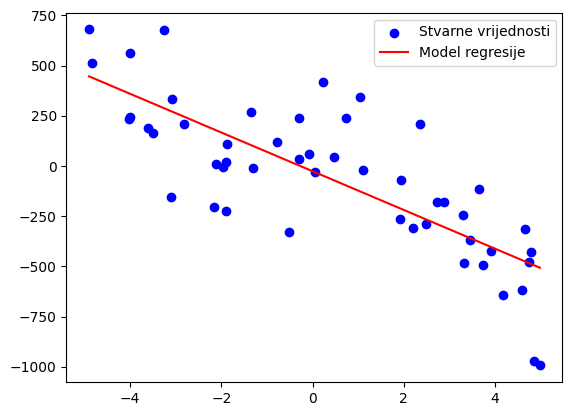

MSE =  52576.82701651932


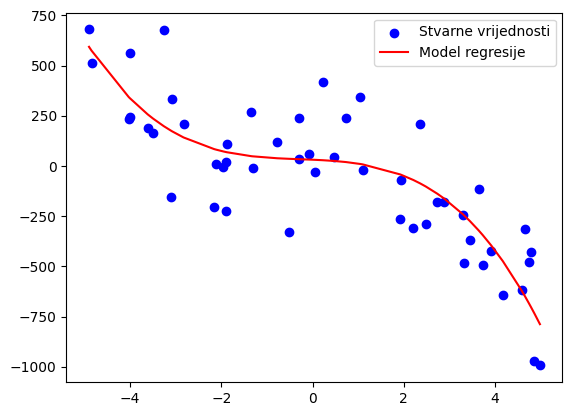

MSE =  38304.20462412169


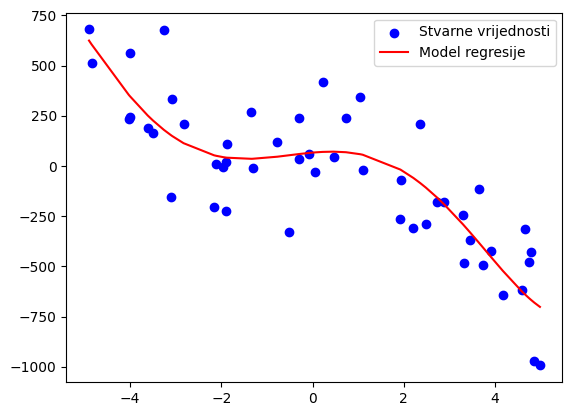

MSE =  37085.753313641304


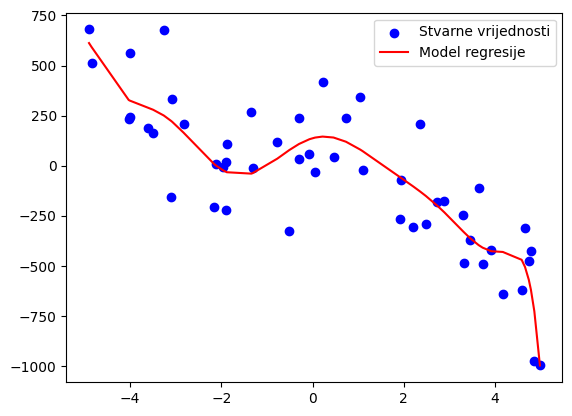

MSE =  31972.276978115715


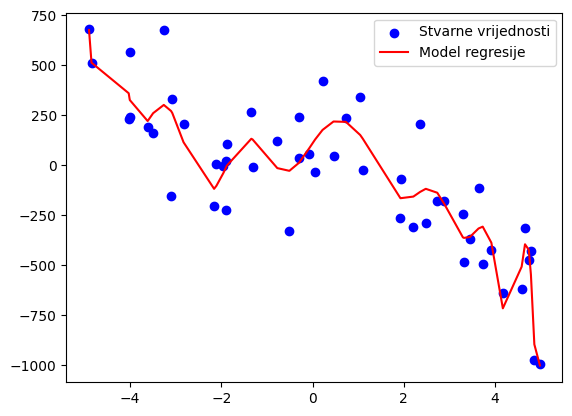

MSE =  24487.56218941119
Best polynomial degree =  20


In [13]:
import sys
d = [1, 3, 5, 10, 20]
mse = sys.float_info.max
minDegreeError = -1

for i in d:
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    plt.scatter(X_poly[:, 1], y, color='blue', label='Stvarne vrijednosti')
    plt.plot(X_poly[:, 1], y_pred, color='red', label='Model regresije')
    plt.legend()
    plt.show()

    newMSE = mean_squared_error(y, y_pred)
    print("MSE = ", newMSE)

    if (mse > newMSE):
        mse = newMSE
        minDegreeError = i

print("Best polynomial degree = ", minDegreeError)
    

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

[ 8.32939691  9.14649035  8.10499017  7.7766907   8.22202794  8.3157562
  9.86521504 10.18886826 10.171162   10.17782018 10.34525296 11.11831563
 13.15044918 15.12738828 15.37667888 15.99318652 17.36604832 15.6755711
 14.29297837 22.15074989]


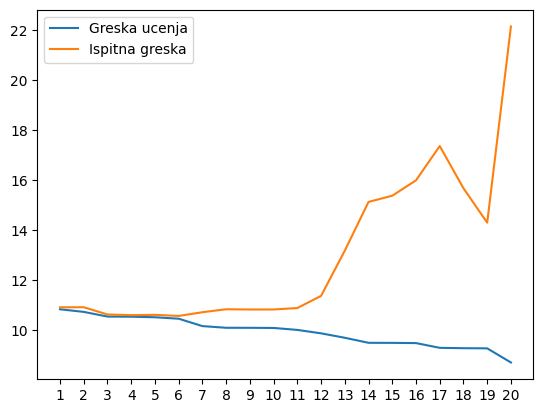

In [14]:
from sklearn.model_selection import train_test_split
import math
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
# pogreška učenja i ispitna pogreška na jednom grafu
Xi = np.array([])
MSE_difference = np.array([])
MSE_onlyTrain = np.array([])
MSE_onlyTest = np.array([])
for i in range (1, 21):
    poly = PolynomialFeatures(degree=i)
    newX_train = poly.fit_transform(X_train)
    newX_test = poly.transform(X_test)
    model = LinearRegression()
    model.fit(newX_train, y_train)
    y_pred_train = model.predict(newX_train)
    y_pred_test = model.predict(newX_test)

    MSE_train = mean_squared_error(y_train, y_pred_train)
    MSE_test = mean_squared_error(y_test, y_pred_test)
    
    Xi = np.append(Xi, i)
    MSE_difference = np.append(MSE_difference, math.log(abs(MSE_test - MSE_train)))
    MSE_onlyTrain = np.append(MSE_onlyTrain, math.log(abs(MSE_train)))  
    MSE_onlyTest = np.append(MSE_onlyTest, math.log(abs(MSE_test)))  

print(MSE_difference)

plt.plot(Xi, MSE_onlyTrain, Xi, MSE_onlyTest)
plt.xticks(range(1, 21))
plt.legend(['Greska ucenja', 'Ispitna greska'])
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

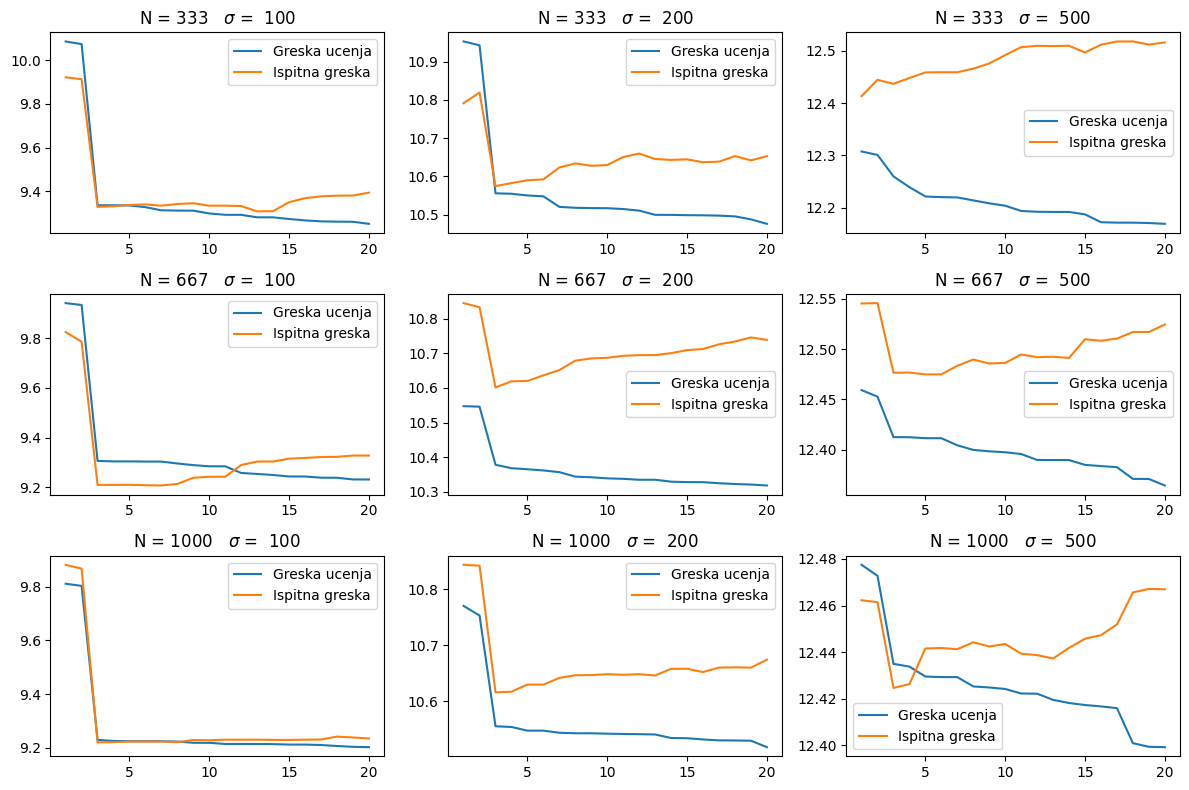

In [15]:
import random
N = [1/3, 2/3, 1]
noise = [100, 200, 500]
degrees = np.arange(1, 21)

a = sorted(make_instances(-5, 5, 1000))
X = np.array(a).reshape(-1, 1)
X_train, X_test = train_test_split(X, test_size=0.5)

fig, axes = plt.subplots(3, 3, figsize=(12, 8))
a = 0

for i in N:
    X_train_N = X_train[np.random.choice(X_train.shape[0], round(i*X_train.shape[0]), replace=False), :]
    X_test_N = X_test[np.random.choice(X_test.shape[0], round(i*X_test.shape[0]), replace=False), :]
    b = 0
    for j in noise:
        y_train = make_labels(X_train_N, f, noise = j)
        y_test = make_labels(X_test_N, f, noise = j)

        train_error = np.array([])
        test_error = np.array([])
        for degree in degrees:
            poly = PolynomialFeatures(degree=degree)
            X_train_degree = poly.fit_transform(X_train_N)
            X_test_degree = poly.transform(X_test_N)

            model = LinearRegression()
            model.fit(X_train_degree, y_train)
            y_pred_train = model.predict(X_train_degree)
            y_pred_test = model.predict(X_test_degree)

            train_error = np.append(train_error, np.log(mean_squared_error(y_train, y_pred_train)))
            test_error = np.append(test_error, np.log(mean_squared_error(y_pred_test, y_test)))

        ax = axes[a, b]
        ax.plot(degrees, train_error, degrees, test_error)
        ax.set_title(f"N = {round(i * 1000)}   $\sigma$ =  {j}")
        ax.legend(['Greska ucenja', 'Ispitna greska'])

        b += 1
    a += 1

plt.tight_layout()  # Za bolji prikaz kad su grafikoni blizu jedan drugog
plt.show()



***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

**1.** Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [19]:
X = np.array([0, 1, 2, 4]).reshape(-1, 1)
y = np.array([4, 1, 2, 5])

poly = PolynomialFeatures(degree=3)
fi = poly.fit_transform(X)

lam = np.array([0, 1, 10])

for l in lam:
    w = (linalg.inv((fi.T @ fi) + (np.identity(fi.shape[0]) * l)) @ fi.T) @ y
    print("w = ", w)

w =  [ 4.         -5.91666667  3.375      -0.45833333]
w =  [ 1.79567372 -0.24729075 -0.0175289   0.07014758]
w =  [0.43312265 0.11060671 0.13827839 0.03093411]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [20]:
from sklearn.linear_model import Ridge
alpha = [0, 1, 10]
for a in alpha:
    ridge = Ridge(alpha=a, fit_intercept=False)
    w = ridge.fit(fi, y)
    print(w.coef_)


[ 4.         -5.91666667  3.375      -0.45833333]
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
[0.43312265 0.11060671 0.13827839 0.03093411]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

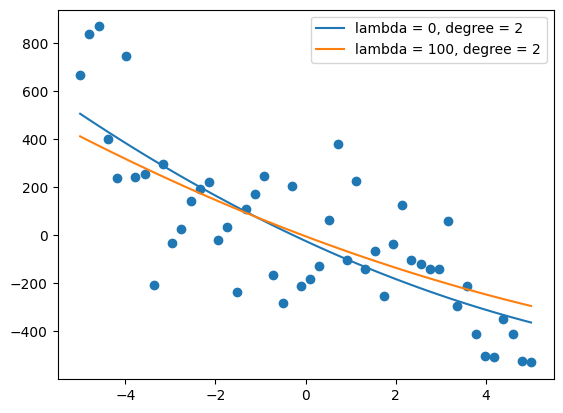

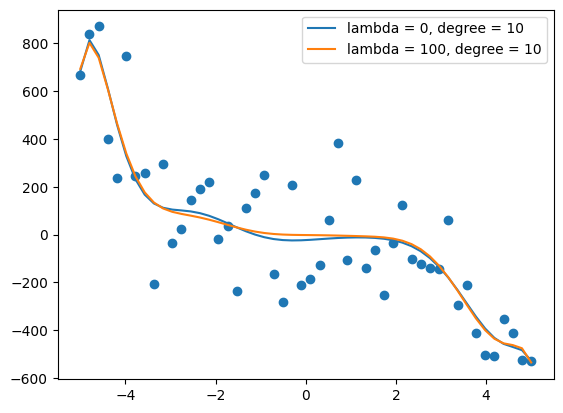

In [18]:
X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)
lamb = [0, 100]
d = [2, 10]

for degree in d:
    plt.scatter(X, y)
    for i in lamb:
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)
        ridge = Ridge(alpha=i, fit_intercept=False)
        ridge.fit(X_poly, y)
        y_pred = ridge.predict(X_poly)
        plt.plot(X, y_pred, label=f"lambda = {i}, degree = {degree}")
    plt.legend()
    plt.show()

    




### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


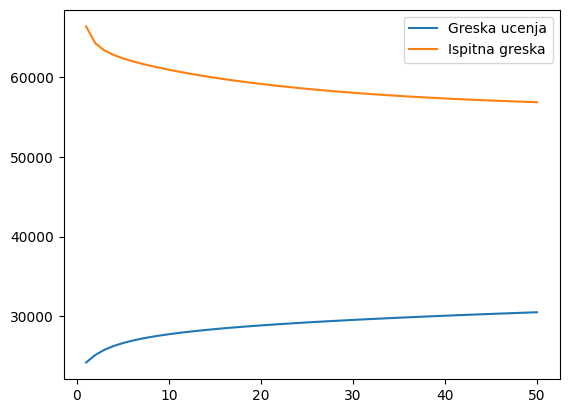

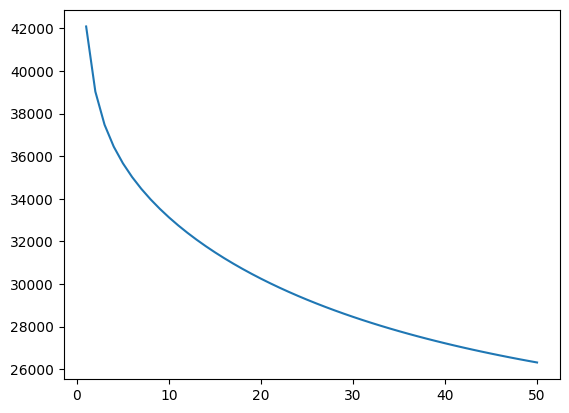

In [19]:
X = np.sort(make_instances(-5, 5, 50)).reshape(-1, 1)
y = make_labels(X, f, 200)

d = 10
alpha = np.arange(1, 51)
MSE_train = np.array([])
MSE_test = np.array([])
MSE_diff = np.array([])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

for a in alpha:
    poly = PolynomialFeatures(degree = d)
    ridge = Ridge(alpha=a, fit_intercept=False)
    newX_train = poly.fit_transform(X_train)
    newX_test = poly.transform(X_test)

    ridge.fit(newX_train, y_train)
    y_pred_train = ridge.predict(newX_train)
    y_pred_test = ridge.predict(newX_test)
    error_train = mean_squared_error(y_pred_train, y_train)
    error_test = mean_squared_error(y_pred_test, y_test)
    MSE_train = np.append(MSE_train, error_train)
    MSE_test = np.append(MSE_test, error_test)
    MSE_diff = np.append(MSE_diff, abs(error_train - error_test))


plt.plot(alpha, MSE_train, alpha, MSE_test)
plt.legend(["Greska ucenja", "Ispitna greska"])
plt.show()

plt.plot(alpha, MSE_diff, label="MSE_diff")
plt.show()


### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [20]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

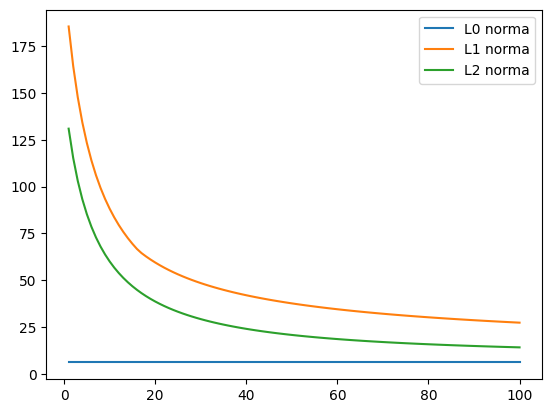

In [21]:
from sklearn.linear_model import Ridge
d = 5
alpha = np.arange(1, 101)
L0_norm = np.array([])
L1_norm = np.array([])
L2_norm = np.array([])
for a in alpha:
    poly = PolynomialFeatures(degree = d)
    newX_train = poly.fit_transform(X_train)
    newX_test = poly.transform(X_test)

    ridge = Ridge(alpha = a, fit_intercept=False)
    ridge.fit(newX_train, y_train)
    L0_norm = np.append(L0_norm, nonzeroes(ridge.coef_[0, :]))
    L1_norm = np.append(L1_norm, sum(abs(ridge.coef_[0, :])))
    L2_norm = np.append(L2_norm, np.linalg.norm(ridge.coef_[0, :]))


plt.plot(alpha, L0_norm, alpha, L1_norm, alpha, L2_norm)
plt.legend(["L0 norma", "L1 norma", "L2 norma"])
plt.show()


### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

In [21]:
from sklearn.linear_model import Lasso
d = 5
alpha = np.arange(1, 101)
L0_norm = np.array([])
L1_norm = np.array([])
L2_norm = np.array([])
for a in alpha:
    poly = PolynomialFeatures(degree = d)
    newX_train = poly.fit_transform(X_train)
    newX_test = poly.transform(X_test)

    lasso = Lasso(alpha = a, fit_intercept=False)
    lasso.fit(newX_train, y_train)
    L0_norm = np.append(L0_norm, nonzeroes(lasso.coef_))
    L1_norm = np.append(L1_norm, sum(abs(lasso.coef_)))
    L2_norm = np.append(L2_norm, np.linalg.norm(lasso.coef_))


plt.plot(alpha, L0_norm, alpha, L1_norm, alpha, L2_norm)
plt.legend(["L0 norma", "L1 norma", "L2 norma"])
plt.grid()
plt.show()

NameError: name 'nonzeroes' is not defined

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [311]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

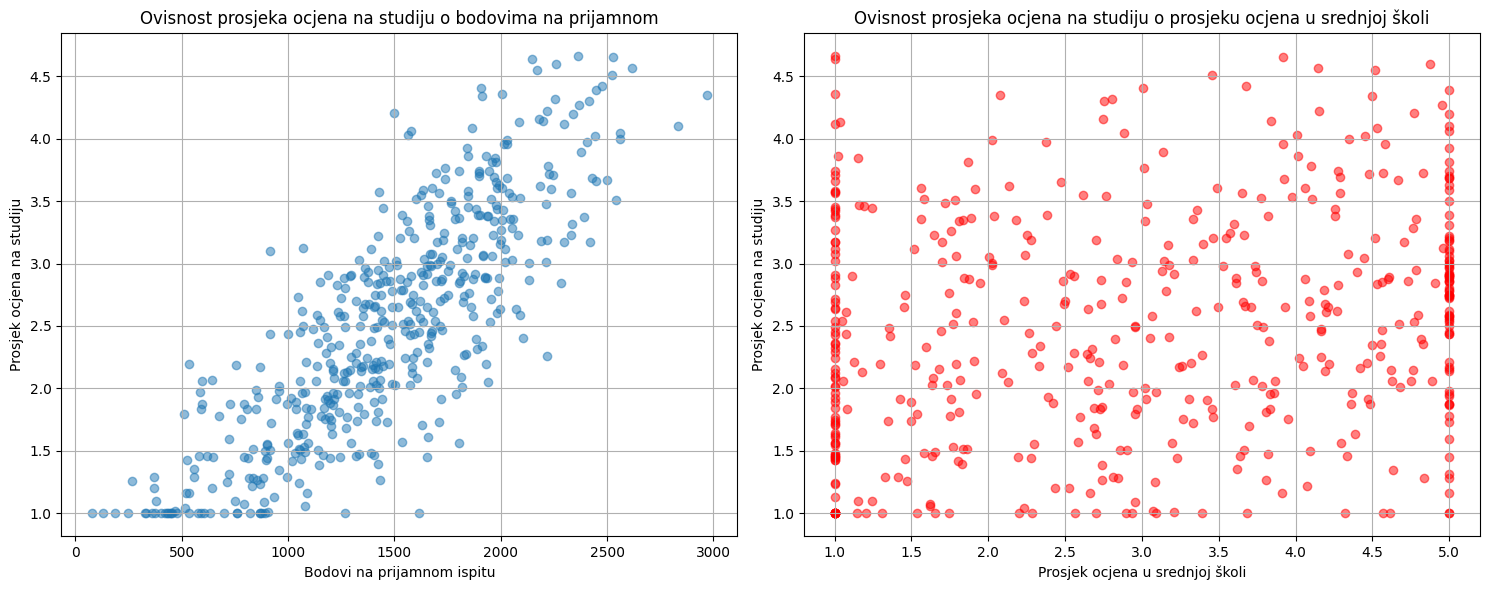

In [312]:

plt.figure(figsize=(15, 6))

# Ovisnost ciljne vrijednosti o bodovima na prijamnom ispitu
plt.subplot(1, 2, 1) # 1 red, 2 stupca, 1. graf
plt.scatter(exam_score, grades_y, alpha=0.5)
plt.title("Ovisnost prosjeka ocjena na studiju o bodovima na prijamnom")
plt.xlabel("Bodovi na prijamnom ispitu")
plt.ylabel("Prosjek ocjena na studiju")
plt.grid(True)

# Ovisnost ciljne vrijednosti o ocjenama iz srednje škole
plt.subplot(1, 2, 2) # 1 red, 2 stupca, 2. graf
plt.scatter(grade_in_highschool, grades_y, alpha=0.5, color='r')
plt.title("Ovisnost prosjeka ocjena na studiju o prosjeku ocjena u srednjoj školi")
plt.xlabel("Prosjek ocjena u srednjoj školi")
plt.ylabel("Prosjek ocjena na studiju")
plt.grid(True)

plt.tight_layout()
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [313]:
ridge = Ridge(alpha=0.01)
ridge.fit(grades_X, grades_y)
y_pred = ridge.predict(grades_X)
print("Težine na originalnim podacima:", ridge.coef_)


Težine na originalnim podacima: [0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [314]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(grades_X)
scalerY = StandardScaler().fit(grades_y.reshape(-1, 1))
grades_X_fixed = scalerX.transform(grades_X)
grades_y_fixed = scalerY.transform(grades_y.reshape(-1, 1))

ridge_fixed = Ridge(alpha=0.01)
ridge_fixed.fit(grades_X_fixed, grades_y_fixed)
print("Težine na skaliranim podacima:", ridge_fixed.coef_)

Težine na skaliranim podacima: [[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [315]:
grades_X_fixed_colinear = np.hstack((grades_X_fixed, grades_X_fixed[:, -1].reshape(-1, 1)))
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [316]:
ridge = Ridge(alpha=0.01)
ridge.fit(grades_X_fixed_colinear, grades_y_fixed)
print("Težine na skaliranim multikolinearnim podacima: ", ridge.coef_)


Težine na skaliranim multikolinearnim podacima:  [[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [317]:
alpha = [0.01, 1000]
weights_001 = np.empty((0, 3))
weights_1000 = np.empty((0, 3))
for i in range (10):
    x_y = np.hstack((grades_X_fixed_colinear, grades_y_fixed.reshape(-1, 1)))
    x_y = x_y[np.random.choice(x_y.shape[0], round(0.5 * x_y.shape[0])), :]
    x7 = x_y[:, 0:-1]
    y7 = x_y[:, -1]
    # print("x_y\n", x_y[0, :])
    # print("x\n", x7[0, :])
    # print("y\n", y7[0])

    for a in alpha:
        ridge = Ridge(alpha=a)
        ridge.fit(x7, y7)

        if (a == 0.01):
            weights_001 = np.insert(weights_001, weights_001.shape[0], ridge.coef_, axis=0)
        else:
            weights_1000 = np.insert(weights_1000, weights_1000.shape[0], ridge.coef_, axis=0)


std_dev_001 = np.std(weights_001, axis=0)
std_dev_1000 = np.std(weights_1000, axis=0)

print("Standardne devijacije za model s lambda=0.01:", std_dev_001)
print("Standardne devijacije za model s lambda=1000:", std_dev_1000)

Standardne devijacije za model s lambda=0.01: [0.03492744 0.01639009 0.01639009]
Standardne devijacije za model s lambda=1000: [0.00666392 0.00991688 0.00991688]


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.